# **1.) Exploratory Data Analysis (EDA)**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
!pip install pyngrok
!pip install flask-ngrok


# Load the dataset
file_path = 'user_behavior_dataset.csv'
mobile_data = pd.read_csv(file_path)

# Load the first 10 rows to get initial look at data
mobile_data.head(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
5,6,Google Pixel 5,Android,99,2.0,940,35,564,31,Male,2
6,7,Samsung Galaxy S21,Android,350,7.3,1802,66,1054,21,Female,4
7,8,OnePlus 9,Android,543,11.4,2956,82,1702,31,Male,5
8,9,Samsung Galaxy S21,Android,340,7.7,2138,75,1053,42,Female,4
9,10,iPhone 12,iOS,424,6.6,1957,75,1301,42,Male,4


In [2]:
# gives name and data type of each variable in the dataset
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [3]:
# shows statistics of each variable for idea of differences
mobile_data.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [4]:
# shows exact number of unique variables in dataset
mobile_data.nunique()

,0
User ID,700
Device Model,5
Operating System,2
App Usage Time (min/day),387
Screen On Time (hours/day),108
Battery Drain (mAh/day),628
Number of Apps Installed,86
Data Usage (MB/day),585
Age,42
Gender,2


In [5]:
# seperate variables in to categories to keep them straight and easier to access later
continuous = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)','Number of Apps Installed', 'Data Usage (MB/day)', 'Age']

In [6]:
# mean and standard deviation numbers before standardization for comparison
print(mobile_data[continuous].mean())
print(mobile_data[continuous].std())

App Usage Time (min/day)       271.128571
Screen On Time (hours/day)       5.272714
Battery Drain (mAh/day)       1525.158571
Number of Apps Installed        50.681429
Data Usage (MB/day)            929.742857
Age                             38.482857
dtype: float64
App Usage Time (min/day)      177.199484
Screen On Time (hours/day)      3.068584
Battery Drain (mAh/day)       819.136414
Number of Apps Installed       26.943324
Data Usage (MB/day)           640.451729
Age                            12.012916
dtype: float64


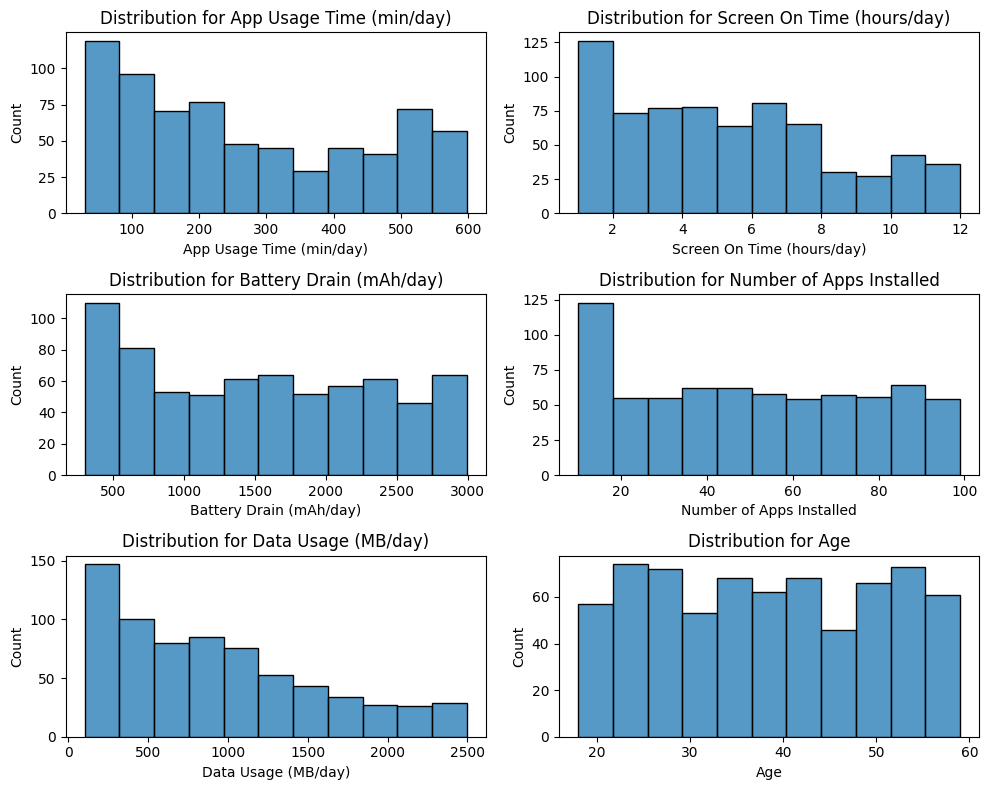

In [7]:
# histogram of continuous variables. Used for a general idea of how the spread of continuous(numerical features) are distributed
plt.figure(figsize=(10, 8))
for i, column in enumerate(continuous, 1):
    plt.subplot(3, 2, i)
    sns.histplot(mobile_data[column])
    plt.title(f'Distribution for {column}')
plt.tight_layout()
plt.show()

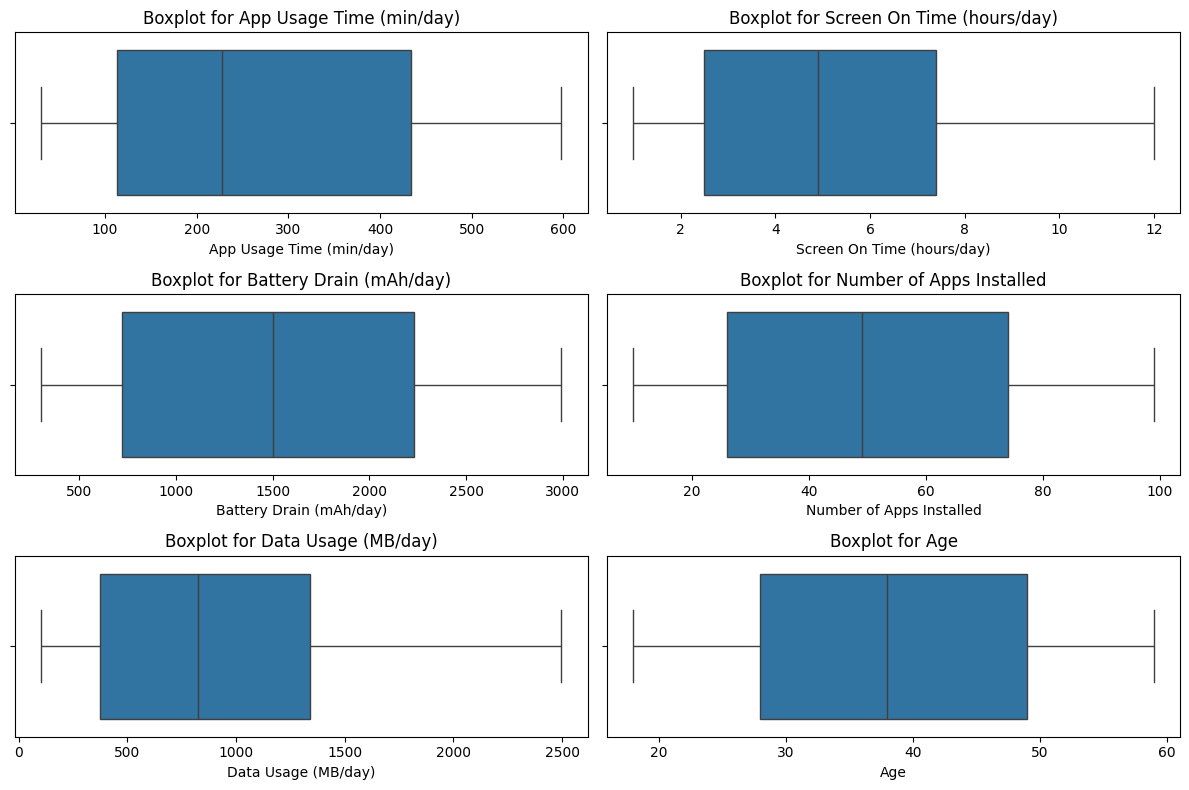

In [8]:
# Box plot of continuous variables. Used for a visualization of where most variables sit value wise.
plt.figure(figsize=(12, 8))
for i, column in enumerate(continuous, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=mobile_data[column])
    plt.title(f'Boxplot for {column}')
plt.tight_layout()
plt.show()

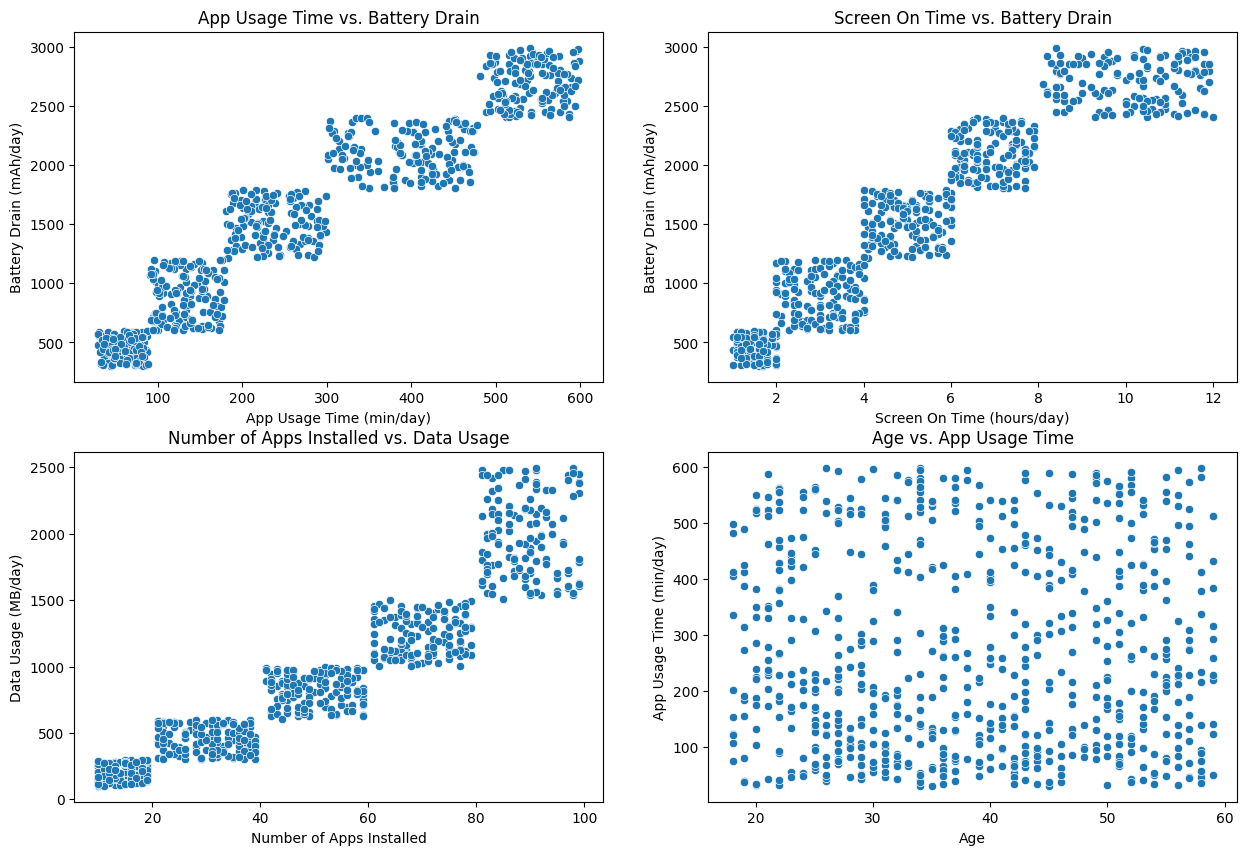

In [9]:
# used several different scatter plots to compare the variables that I think would have some sort of correlation. Tried one big one but it was way too hard to read so split it into multiple subplots.
plt.figure(figsize=(15, 10))

# Scatter plot of App Usage Time vs. Battery Drain
plt.subplot(2, 2, 1)
sns.scatterplot(x='App Usage Time (min/day)', y='Battery Drain (mAh/day)', data=mobile_data)
plt.title('App Usage Time vs. Battery Drain')

# Scatter plot of Screen On Time vs. Battery Drain
plt.subplot(2, 2, 2)
sns.scatterplot(x='Screen On Time (hours/day)', y='Battery Drain (mAh/day)', data=mobile_data)
plt.title('Screen On Time vs. Battery Drain')

# Scatter plot of Number of Apps Installed vs. Data Usage
plt.subplot(2, 2, 3)
sns.scatterplot(x='Number of Apps Installed', y='Data Usage (MB/day)', data=mobile_data)
plt.title('Number of Apps Installed vs. Data Usage')

# Scatter plot of Scatter plot: Age vs. App Usage Time
plt.subplot(2, 2, 4)
sns.scatterplot(x='Age', y='App Usage Time (min/day)', data=mobile_data)
plt.title('Age vs. App Usage Time')

plt.show()

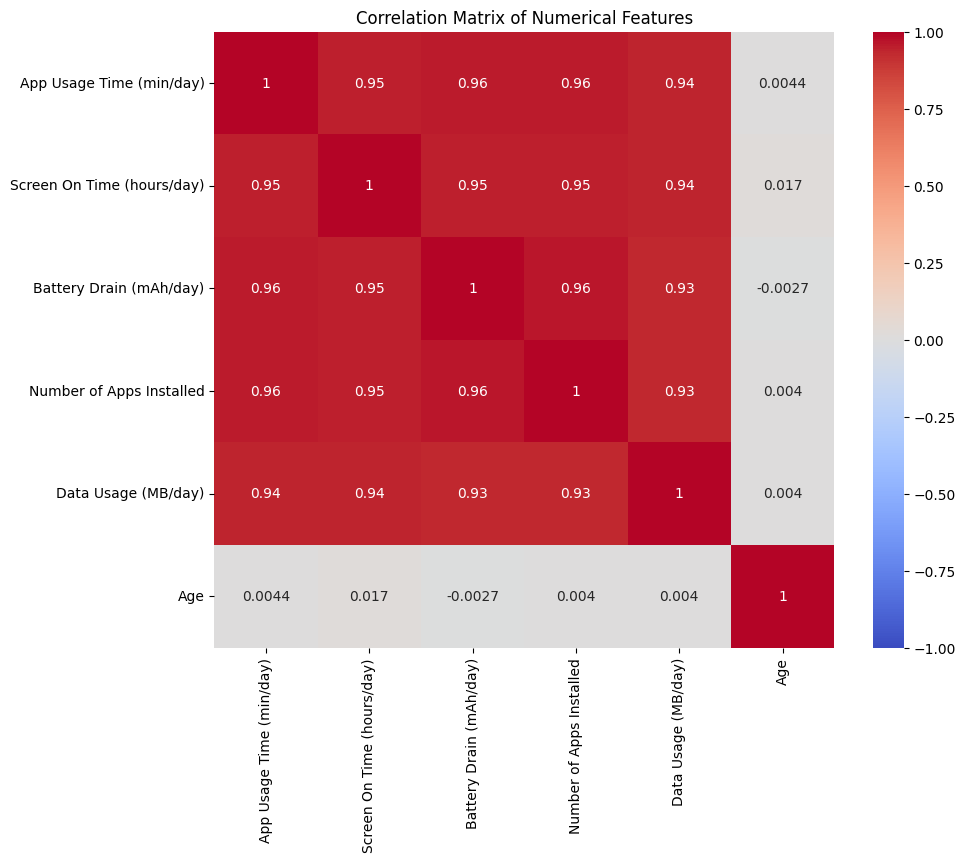

In [10]:
# correlation matrix to show true correlation between numerical variables.
plt.figure(figsize=(10, 8))
correlation_matrix = mobile_data[continuous].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [11]:
# establish categorical variables and use this for categorical visualization exploration
categorical = ['Device Model', 'Operating System', 'Gender']

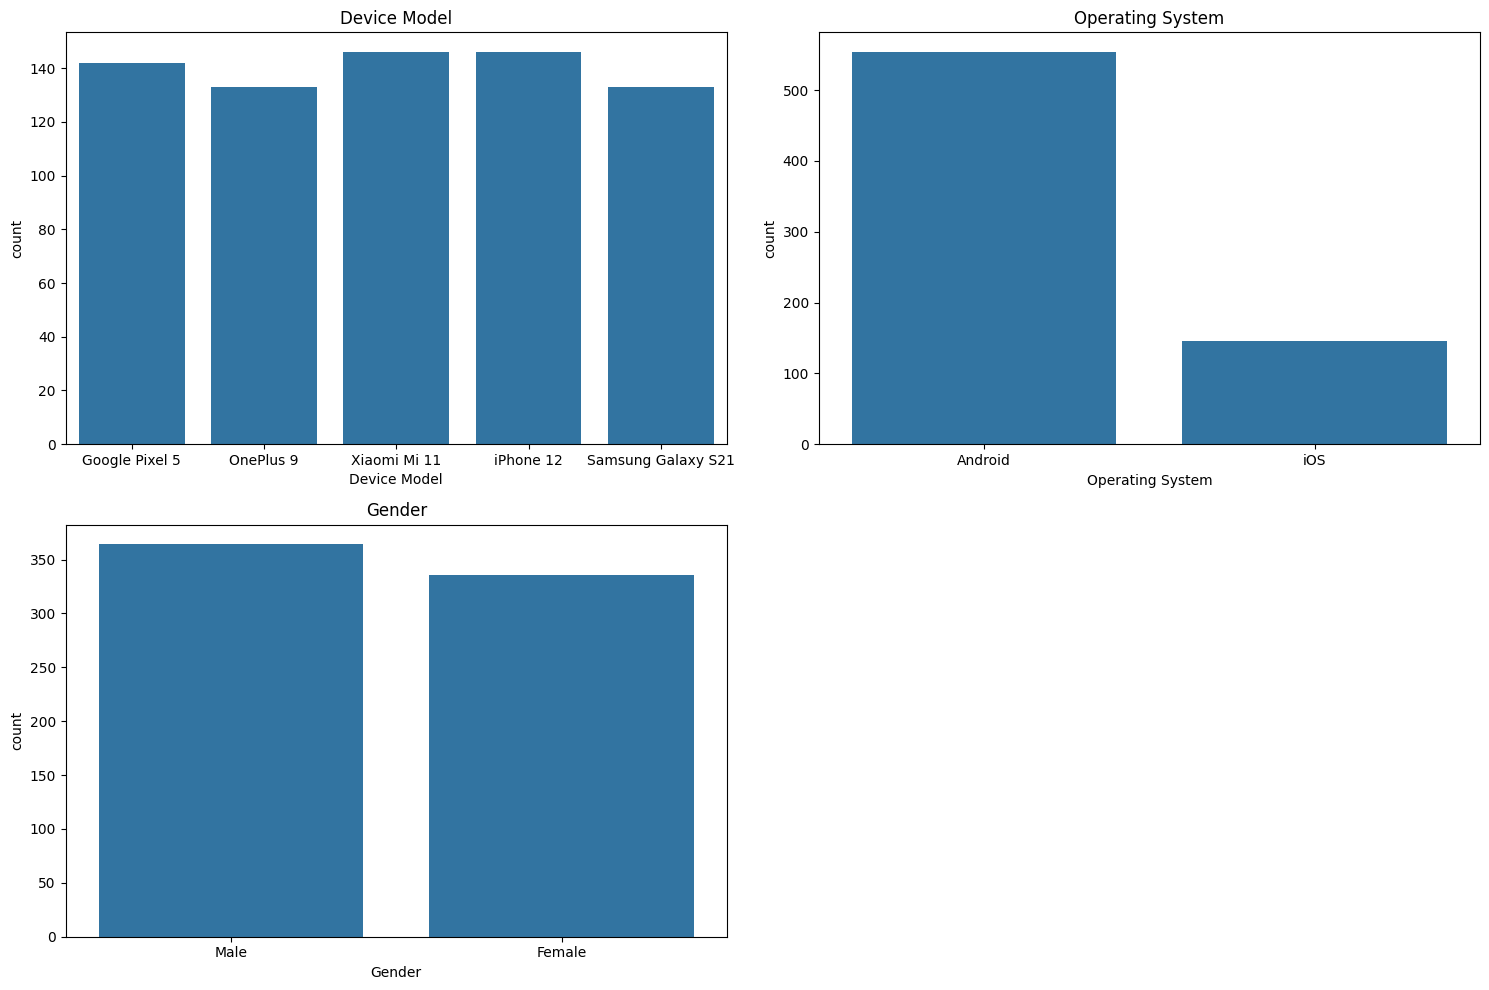

In [12]:
# bar chart for categorical variables to visualize potential skewness.
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=mobile_data[var])
    plt.title(f'{var}')
plt.tight_layout()
plt.show()

In [13]:
# pivot tables of all categorical data to get a more numerical view of the ratios

# Pivot table for count of User Behavior Class by Device Model and Gender
pivot_table_class_by_device_gender = mobile_data.pivot_table(values='User Behavior Class', index='Device Model', columns='Gender', aggfunc='count', fill_value=0)
print("Pivot Table: Count of User Behavior Class by Device Model and Gender")
print(pivot_table_class_by_device_gender)

print("\n" + "-"*50 + "\n")

# Pivot table for average App Usage Time by Operating System and Gender
pivot_table_usage_by_os_gender = mobile_data.pivot_table(values='App Usage Time (min/day)', index='Operating System', columns='Gender', aggfunc='mean')
print("Pivot Table: Average App Usage Time by Operating System and Gender")
print(pivot_table_usage_by_os_gender)

print("\n" + "-"*50 + "\n")

# Pivot table for count of User Behavior Class by Operating System and Device Model
pivot_table_class_by_os_device = mobile_data.pivot_table(values='User Behavior Class', index='Operating System', columns='Device Model', aggfunc='count', fill_value=0)
print("Pivot Table: Count of User Behavior Class by Operating System and Device Model")
print(pivot_table_class_by_os_device)

print("\n" + "-"*50 + "\n")

# Pivot table for average Battery Drain by Device Model and User Behavior Class
pivot_table_battery_by_device_class = mobile_data.pivot_table(values='Battery Drain (mAh/day)', index='Device Model', columns='User Behavior Class', aggfunc='mean')
print("Pivot Table: Average Battery Drain by Device Model and User Behavior Class")
print(pivot_table_battery_by_device_class)


Pivot Table: Count of User Behavior Class by Device Model and Gender
Gender              Female  Male
Device Model                    
Google Pixel 5          69    73
OnePlus 9               61    72
Samsung Galaxy S21      54    79
Xiaomi Mi 11            78    68
iPhone 12               74    72

--------------------------------------------------

Pivot Table: Average App Usage Time by Operating System and Gender
Gender                Female        Male
Operating System                        
Android           268.026718  268.465753
iOS               285.918919  278.013889

--------------------------------------------------

Pivot Table: Count of User Behavior Class by Operating System and Device Model
Device Model      Google Pixel 5  OnePlus 9  Samsung Galaxy S21  Xiaomi Mi 11  \
Operating System                                                                
Android                      142        133                 133           146   
iOS                            0         

## summary of EDA: I followed a similar EDA process that we used for the titanic data set. I decided to use histograms, box plots, and scatter plots to get a good idea of where the outliers were in the continuous data and then used heat maps, bar charts, and pivot tables to get a good visualization of the categorical data to see if there was any skewed variables. The largest one I noticed was the difference in the amount of android users compared to iphone users. There are three times as many android users as there are to iphones. I also found several linear relationships in the continuous data except with age and screen time usage. This one was all over the place and had no clear pattern. Based off the numbers shown in the initial exploration, there seems to be no null data in the dataset so this removes the need for handling missing values.

# **2.) Data Cleaning**

In [14]:
# Remove outliers using the IQR method
Q1 = mobile_data[continuous].quantile(0.25)
Q3 = mobile_data[continuous].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outliers
mobile_data_no_outliers = mobile_data[~((mobile_data[continuous] < lower_bound) | (mobile_data[continuous] > upper_bound)).any(axis=1)]

# Print the results to see how many outliers were removed
print("Original dataset outlier count:", mobile_data.shape)
print("Dataset count after removing outliers:", mobile_data_no_outliers.shape)



Original dataset outlier count: (700, 11)
Dataset count after removing outliers: (700, 11)


In [15]:
# Remove outliers using the IQR method
Q1 = mobile_data[continuous].quantile(0.25)
Q3 = mobile_data[continuous].quantile(0.75)
IQR = Q3 - Q1

# No outliers were removed in initial IQR method so changed the bounds to be a bit more strict as we could visually see some outliers in EDA data.
lower_bound = Q1 - 1.0 * IQR
upper_bound = Q3 + 1.0 * IQR

mobile_data_no_outliers = mobile_data[~((mobile_data[continuous] < lower_bound) | (mobile_data[continuous] > upper_bound)).any(axis=1)]

# Print the results to see how many outliers were removed
print("Original dataset outlier count:", mobile_data.shape)
print("Dataset count after removing outliers:", mobile_data_no_outliers.shape)


Original dataset outlier count: (700, 11)
Dataset count after removing outliers: (673, 11)


### Steps of data cleaning: As shown in the beginning during the data exploration, there were no missing values so there was no need for imputation or removal of data. As for handling of the categorical data, I originally used label encoding but decided that one hot encoding would be a better choice and did that in feature engineering as it is listed there in the instructions. There was no point to do both. For the outliers in the continuous (numerical) data, I used teh IQR method. When doing the traditional method, the value of the dataset count didn't change so I adjusted the formula a bit to see if I could get results since I could clearly see some outliers in the EDA portion. This at least adjusted the count a little and I believe helped equalize the data a bit as you will see later in part 3.

# **3.) Feature Engineering**

In [16]:
# Usage time per app feature for average app usage time per app
mobile_data['Usage Per App'] = mobile_data['App Usage Time (min/day)'] / mobile_data['Number of Apps Installed']

# Battery drain feature for battery drain per hour of screen-on time
mobile_data['Battery Drain per Hour'] = mobile_data['Battery Drain (mAh/day)'] / mobile_data['Screen On Time (hours/day)']

# Interaction feature between age and app usage time
mobile_data['Age & App correlation'] = mobile_data['Age'] * mobile_data['App Usage Time (min/day)']


In [17]:
# Applying one-hot encoding to the categorical variables
mobile_data = pd.get_dummies(mobile_data, columns=categorical, drop_first=True)

In [18]:
# Initialize the scaler
scaler = StandardScaler()

# Standardize the numerical features
mobile_data[continuous] = scaler.fit_transform(mobile_data[continuous])


In [19]:
# Display the first few rows of the dataset to show if new features are calculated well
print("Sample data with new features:")
print(mobile_data[['App Usage Time (min/day)', 'Number of Apps Installed', 'Usage Per App', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Battery Drain per Hour', 'Age', 'Age & App correlation']].head(10))


Sample data with new features:
   App Usage Time (min/day)  Number of Apps Installed  Usage Per App  \
0                  0.688256                  0.606096       5.865672   
1                 -0.017668                 -0.322441       6.380952   
2                 -0.661471                 -0.693856       4.812500   
3                 -0.181443                  0.197540       4.267857   
4                 -0.475107                  0.271823       3.224138   
5                 -0.972078                 -0.582432       2.828571   
6                  0.445418                  0.568954       5.303030   
7                  1.535365                  1.163218       6.621951   
8                  0.388944                  0.903228       4.533333   
9                  0.863325                  0.903228       5.653333   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                    0.367626                 0.423726   
1                   -0.186771                -0.237198   
2 

In [20]:
# Check mean and standard deviation for standardized continuous variables to see if std is close to 0 and mean close to 1
print("Mean and standard deviation for standardized features:")
print(mobile_data[continuous].mean())
print("\n" + "-"*50 + "\n")
print(mobile_data[continuous].std())


Mean and standard deviation for standardized features:
App Usage Time (min/day)     -2.537653e-17
Screen On Time (hours/day)    1.776357e-17
Battery Drain (mAh/day)       9.896845e-17
Number of Apps Installed      8.945226e-17
Data Usage (MB/day)           0.000000e+00
Age                           6.090366e-17
dtype: float64

--------------------------------------------------

App Usage Time (min/day)      1.000715
Screen On Time (hours/day)    1.000715
Battery Drain (mAh/day)       1.000715
Number of Apps Installed      1.000715
Data Usage (MB/day)           1.000715
Age                           1.000715
dtype: float64


### Summary of Feature engineering: I created new features that had a similar correlation to each other and that seemed relevant in terms of relation. App usage time was one that could be relevant to many so I chose to aim it towards what would impact it most. After careful consideration, the amount of apps installed on the phone and age seemed like the most reasonable as they would likely be the main sources of why someone was more drawn to their phone. The other one of battery usage and screen time felt like the most obvious correlation. As for my choice on one-hot coding, I used it on all the categorical variables as it is the method I am most familiar with and also made the most sense in this situation as the categorical variables don't follow any kind of order. After I completed the feature engineering, I printed out the info to test whether it had worked or not. Based off the fact that the continuous values appear to be around 0 for standard deviation and 1 for mean, I'd say it was quite effective. This should set me up to be able to have a good starting point for milestone 2 when creating the models.

# **4.) Report Preparation: Instructions are not clear on whether to create another report for this part so I will just clarify that each part has a summary with the decision choices and the findings at the bottom. The comments also state what each part does and some contain a bit of reasoning.**

# **Part 2: Model Development (description at bottom)**

In [21]:
# Define features (X) and target (y)
X = mobile_data.drop(columns=['User Behavior Class'])  # All features except the target
y = mobile_data['User Behavior Class']  # Target variable

# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [22]:
# Make predictions on test set
y_pred = logistic_model.predict(X_test_scaled)

# printing model values
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        27

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
 [[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 29  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 27]]


### Model is not performing as intended so I create the others and then proceed to redo the model again after. Left this one in to see how I fixed my errors.

In [23]:
# Initialize Decision Tree
tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)

# Cross-validation
tree_cv_scores = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='accuracy')
print("Decision Tree Accuracy:", tree_cv_scores.mean())

# Train the model
tree_model.fit(X_train, y_train)

Decision Tree Accuracy: 0.9928571428571429


DecisionTreeClassifier(max_depth=10, random_state=42)

In [24]:
# Initialize KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Cross-validation
knn_cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
print("KNN Accuracy:", knn_cv_scores.mean())

# Train the model
knn_model.fit(X_train, y_train)

KNN Accuracy: 0.5339285714285713


KNeighborsClassifier()

In [25]:
# Target variable 'User Behavior Class'
y_classification = mobile_data['User Behavior Class']

# Features already one-hot encoded
X_classification = mobile_data.drop(columns=['User Behavior Class'])

# just needed the variable name and did this for safe measure but no need for imputation and there is no missing values
imputer = SimpleImputer(strategy='median')
X_classification_imputed = imputer.fit_transform(X_classification)

# Split data into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification_imputed, y_classification, test_size=0.2, random_state=42)

# Train Logistic Regression model
clf_model = LogisticRegression(max_iter=1000)
clf_model.fit(X_train_clf, y_train_clf)

y_pred_clf = clf_model.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average='weighted')
recall = recall_score(y_test_clf, y_pred_clf, average='weighted')
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

clf_report = classification_report(y_test_clf, y_pred_clf)

print(f"Logistic Regression Model - Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(clf_report)

Logistic Regression Model - Accuracy: 0.8142857142857143
Precision: 0.8119449114633447
Recall: 0.8142857142857143
F1-score: 0.8123143440612262
Confusion Matrix:
[[25  2  0  0  0]
 [ 3 23  3  0  0]
 [ 0  5 24  5  0]
 [ 0  0  4 20  3]
 [ 0  0  0  1 22]]
Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.93      0.91        27
           2       0.77      0.79      0.78        29
           3       0.77      0.71      0.74        34
           4       0.77      0.74      0.75        27
           5       0.88      0.96      0.92        23

    accuracy                           0.81       140
   macro avg       0.82      0.82      0.82       140
weighted avg       0.81      0.81      0.81       140



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# take data from each model and put it into dataframe to be able to visualize it
results = [
    {"Model": "Logistic Regression", "Accuracy": 0.81, "Precision": 0.81, "Recall": 0.81, "F1-Score": 0.81},
    {"Model": "Decision Tree", "Accuracy": 1.00, "Precision": 1.00, "Recall": 1.00, "F1-Score": 1.00},
    {"Model": "KNN", "Accuracy": 0.56, "Precision": 0.57, "Recall": 0.56, "F1-Score": 0.56},
]
results_df = pd.DataFrame(results)


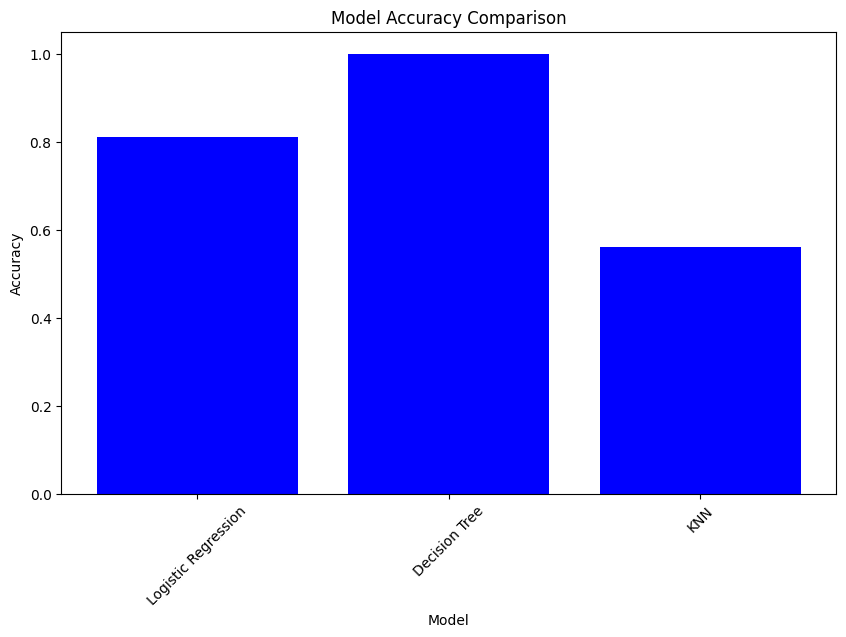

In [27]:
# Plot accuracy for each model
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='blue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

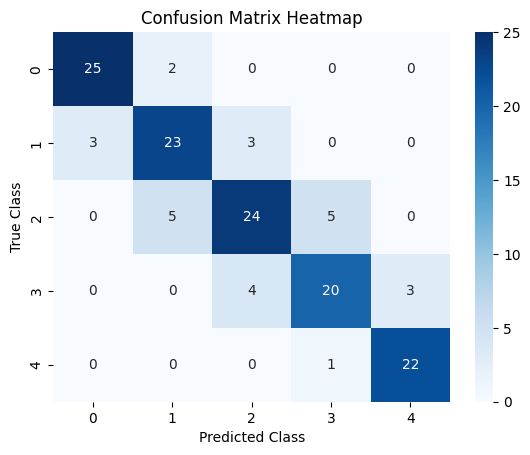

In [28]:
# confusion matrix for comparison
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

## Part 2 Report: I tried following the document and used logistic regression, KNN, and decision tree models like we have in past class examples however I ran into the same issue as I did in the titanic dataset. I got all values of 1 which leads me to believe that there is an overfitting issue or some extreme biased toward a value. I am not sure if it stems from the cross validation or one of the ways the model was trained however it ran into issues I have had before. I didn't use cross validation on the titanic dataset yet still had almost the identical issue. As I ran into this problem yet again, I also fixed it in a similar fashion. I used the same logistic regression model structure as I did in the titanic dataset to fix the issue and get an approriate score for precision and f1. I simply adjusted the model for the fact that the values are already one hot encoded and that there were no missing values in this dataset. I still had to add the imputation value though as it wouldn't properly run without it however the values shouldn't be changed as there is no missing data. The one issue I have run into a lot is the number of iterations output. It requests me to increase number or scale of data or iterations yet no matter how much I increase said value, it doesn't change anything. As the model is quite consistent in accuracy  and precision across the board, I chose to ignore this and continue on. As for visualizing the models performance and comparing them, I used a bar chart and confusion matrix as there were only three different models being compared. The decision tree shows the highest numbers although I believe it is suffering from the same issue as the original logistic regression model was so I believe that the logistic regression performed the best out of the three models. I also tried Random forest however it suffered the same issue as the decision tree so I just removed it as there was no reason to keep it in there if it also had an issue with overfitting. The decision tree is too vulnerable to overfitting and KNN is too weak to larger datasets. Standardization that we did earlier should mitigate its sensitivity to the data being unscaled however it still performed below expected and this is likely due to the size of the dataset. With this in mind, the most logical choice is the logistic regression model for a dataset like this one. At 81% for accuracy, it is the most efficient choice. The data is relatviley linear so it makes sense as to why it'd perform so well.

#  **Part 3: Final Project Report**


###Step 1: Final Performance Analysis:
This was discussed and thoroughly explored at the end of milestone 2 but I will go over it again for clarity.
Logistic Regression model was the final model that I chose to use at it seemed to be the best performing with the least issues. It had a consistent value of about 81% for accuracy, precision, recall, and F1-score. While decision tree has a score of 1.0 across the board, this was likely due to overfitting. KNN had poor performance compared to the other two values so this wasn't in consideration. This only left Logistic regression which is better with overfitting than the other two and offers a bit better value in terms of interpretation. Given that the dataset is quite simple, it seemed like the logical choice. Where it could be improved is in interactions between features and issues with misclassification. Features with interaction like App and App usage time appear to have some missing interaction data based on the coefficients received. Overall, with the data provided, this is likely the most efficient option given the relatively simple implementation strategies needed to implement it and the low computation cost.



### Step 2: Deployment plan: there will be a video link for the explanation of this. Except the considerations are at the end of this part as they were not discussed in the video.

Link: https://youtu.be/dFVaAPRHW7A

In [29]:
import pickle

# Save the trained Logistic Regression model into .pkl file for mock deployment
with open("final_model.pkl", "wb") as f:
    pickle.dump(logistic_model, f)

print("Model saved as final_model.pkl")
from pyngrok import ngrok

# Authenticate ngrok with unique token
ngrok.set_auth_token("2pyB4VtTyvn7V31QOKbwva0jUn0_HK54pfJoihoM8ynLPQLj")

print("ngrok authenticated successfully!")



Model saved as final_model.pkl
ngrok authenticated successfully!


In [42]:
from flask import Flask, request, jsonify
from pyngrok import ngrok
import pickle
import threading

# Load the trained model
with open("final_model.pkl", "rb") as f:
    model = pickle.load(f)

# Create Flask app
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    features = data['features']
    prediction = model.predict([features])
    return jsonify({'prediction': int(prediction[0])})

# Start ngrok tunnel to port 5000
public_url = ngrok.connect(5000)
print("Public URL:", public_url)

# Function to run Flask app on port 5000
def run_flask():
    app.run(port=5000)

# Start Flask in a background thread to avoid infinite loading issue
thread = threading.Thread(target=run_flask)
thread.start()





Public URL: NgrokTunnel: "https://f6c2-35-245-123-131.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [45]:
import requests

# Replace with the ngrok public URL. This url is retrieved from output above. THIS LINK CHANGES EVERY TIME YOU RUN IT!
url = "https://f6c2-35-245-123-131.ngrok-free.app/predict" # this should always look like something like: https://f6c2-35-245-123-131.ngrok-free.app/ and then predict should be at the end. so https://f6c2-35-245-123-131.ngrok-free.app/predict

# input data for prediction
data = {"features": [0.5, 1.2, -0.8, 3.4, 1.1, 2.0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1]}

# Send POST request
response = requests.post(url, json=data)

# Print the response
if response.status_code == 200:
    print("Prediction:", response.json())
else:
    print("Error:", response.text)



INFO:werkzeug:127.0.0.1 - - [09/Dec/2024 07:41:05] "POST /predict HTTP/1.1" 200 -


Prediction: {'prediction': 5}


In [46]:
# this is to print values for prediction.
print(mobile_data['User Behavior Class'].value_counts())

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64


### For step 2:
I realize I didn't discuss scalabaility, maintenance, and legal compliance in the video so I will add it below.

For scalability: since it was just a mock deployment, I didn't consider this as much. If you wanted to increase its abilities, using a different framework with a full backend and interactable frontend would be the best option. Python should be able to be used to achieve all this. Since a jupyter notebook was where all this data needed to be stored and presented, the flask method I used was the most practical.

For maintainability: Rerunning the application with added improvements should update the .pkl file and be able to give new predicitions. I made this easy to interpret and use so maintainability is one of the strongest features of my model. There is also plenty of error handling throughout and google collab also has features to help the user to interpret certain bugs.

For legal compliance: The data should be relatively secure and no sensitive information is loaded into the application. This could be changed pretty easily by loading a new dataset and changing a few new variable names but there still shouldn't be any legal concerns. Everything is ran locally except through the ngrok tunnel but that should have minimal exposure.

### Step 3: Ethical Considerations:   

Societal impacts: My project in particular offers predictions on app usage based on a already existing dataset. This could be used to cater applications toward a certain demographic based on age and typical screen time per day. It could also be used in exploitative ways to collect personal data on a certain group of people. If the model is used for business related applications and not protected well when displaying the trained model info, personal data could be accessed which would have negative impacts on its societal side of the ethical considerations.

Stakeholder effects: As users are likely directly affected by the predictions the model makes, it could change the services they receive based off said predictions. If the model is trained poorly, discrimination could be an issue even if not intended. Circling back to the issue of data security, since businesses would likely use this, if the model was compromised or misused, you could run into legal ramifications.

Fairness recommendations: My dataset thankfully didn't have too much bias in it but if more data was collected, you could run into issues with that. If male users continued to grow, you'd eventually have an embalance between male and female users which could lead to a biased prediction model. This ethically wouldn't be fair and could lead to problems for both the user and stakeholder. Certain services could be catered more toward a male audience which would create a fairness imbalance. To keep this fair, the dataset should be regularly reviewed and spread across multiple demographics.

Accountability recommendations: With such a short amount of testing on limited amounts of data, it's hard to know if the model performs how it should or contains errors. This could lead to information or predictions being incorrect which would ultimately lead to an undesireable prediction model. In order to combat this, there should be one or two people assigned to maintaining it and constantly checking the information to assure it is performing as intended. There should also be a large amount of error handling messages along with detailed outputs to be able to better interpret data. Having more info isn't a bad thing if it can be interpretted.

Compliance recommendations: Sticking to whatever local laws are in place in the current country of usage would be the best way to assure there are no legal issues. If the data is being collected from potential users or random surveys, a consent form that is well written and reviewed by a lawyer would be the best way to handle this data collection. Also adding several security protocols for the interface and data handling would be another great way to ensure compliance ethics are not violated.